### Problem Statements:

### We want to predict Passenger sales

In [1]:
#IMport libraries
import pandas as pd 
import numpy as np 
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing #SES
from statsmodels.tsa.holtwinters import Holt #Holts Exponetial Smothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the file
data=pd.read_excel(r'E:\DS Assigment\Forecasting/Airlines+Data.xlsx')

In [3]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
data.shape

(96, 2)

In [6]:
# checking the null values
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
# Checking the datatype of the attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


<AxesSubplot:ylabel='Density'>

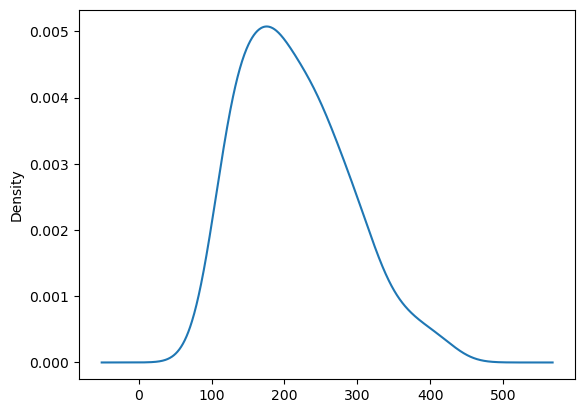

In [8]:
data.Passengers.plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

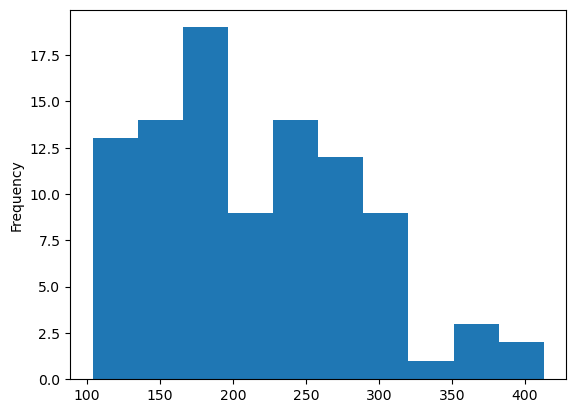

In [9]:
data.Passengers.plot(kind='hist')

In [10]:
v=pd.read_excel(r'E:\DS Assigment\Forecasting/Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)

#### Box plot to visualize the passengers in airlines for each year and identify the presence of any outlier

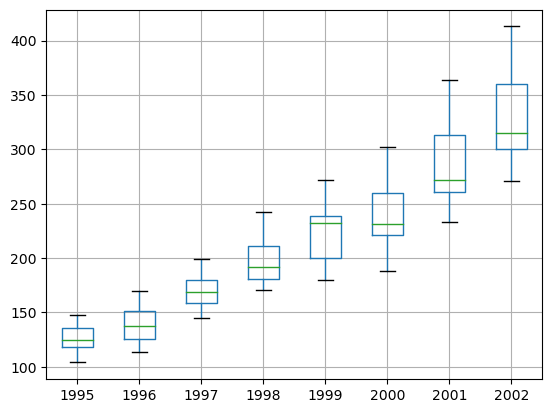

In [11]:
group=v.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for i,j in group:
    years[i.year]=j.values
years.boxplot()
plt.show()

#### Lag plot - plot between lagges values of airline passengers and lagged time

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

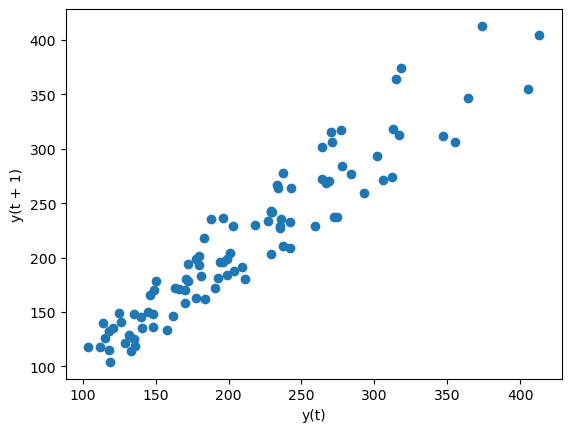

In [12]:
lag_plot(v)

### Performing the data driven methods on the dataset

#### Splitting data

In [13]:
train = data.head(77)
test = data.tail(19)

#### Moving Average and time decomposition plot

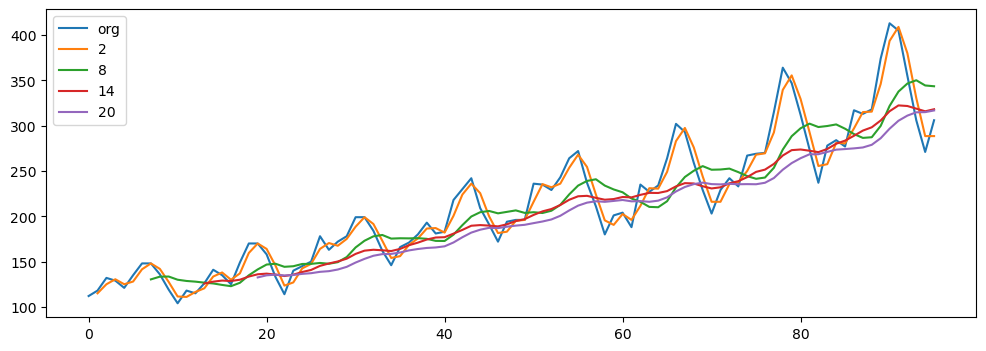

In [14]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

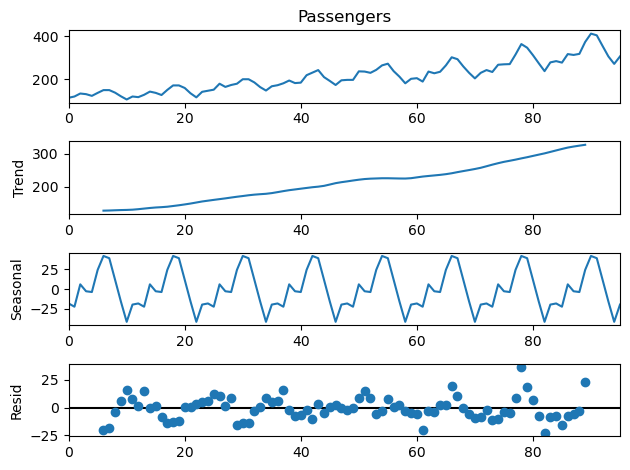

In [15]:
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

#### ACF and PACF plots

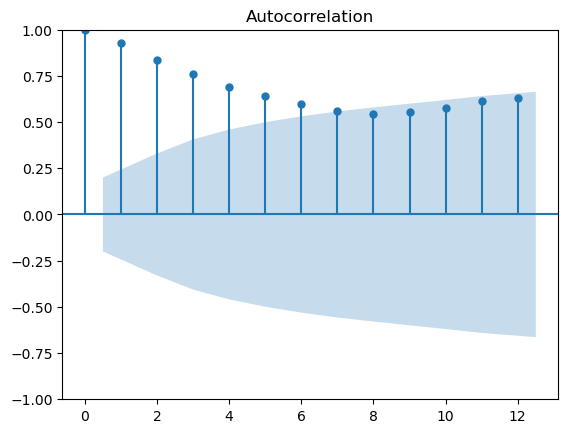

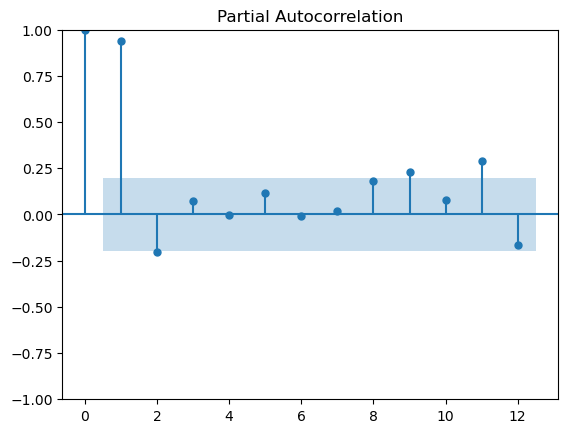

In [16]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

#### Evaluation metric RMSE

In [17]:
def RMSE(pred,org):
    temp = (np.sqrt(np.mean((np.array(org)-np.array(pred))**2)))
    return temp

#### Developing the model of simple exponential method

In [18]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_ses,test.Passengers) 

80.54332901443986

#### Developing the model of Holt method

In [19]:
# Holt method 
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hw,test.Passengers)

47.877728640303836

#### Developing the model of Holts winter exponential smoothing with additive seasonality and additive trend

In [20]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hwe_add_add,test.Passengers) 

35.9104069895042

#### Developing the model of Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [21]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hwe_mul_add,test.Passengers)

30.906540121552787

#### Final model by combining train and test

In [22]:
hwe_model_mul_add_new = ExponentialSmoothing(data["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

#### Forecasting for next 10 time period

In [23]:
hwe_model_mul_add_new.forecast(10)

96     312.898312
97     308.169462
98     355.530127
99     345.766661
100    345.692182
101    392.465936
102    436.495826
103    429.853511
104    380.167289
105    332.311686
dtype: float64

### Conclusion:

#### From the above models, the model with the lowest RMSE value is holts winter exponential smoothing with multiplicative seasonality and additive trend. Thus, we use it to forecast the airlines passengers using the same model.